In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from scipy import spatial
from scipy import signal

# Libreta utilizada para la evaluación del instrumento virtual

# Loop

In [2]:
w1,sr2 = librosa.load("SS/Kobol - 020 (G#0) -mod_ 000.wav")
w2,sr2 = librosa.load("SS/Kobol - 020 (G#0) -mod_ 015.wav")
w3,sr2 = librosa.load("SS/Kobol - 020 (G#0) -mod_ 030.wav")
w4,sr2 = librosa.load("SS/Kobol - 020 (G#0) -mod_ 070.wav")
w5,sr2 = librosa.load("SS/Kobol - 020 (G#0) -mod_ 090.wav")
w6,sr2 = librosa.load("SS/Kobol - 020 (G#0) -mod_ 105.wav")
w7,sr2 = librosa.load("SS/Kobol - 020 (G#0) -mod_ 120.wav")


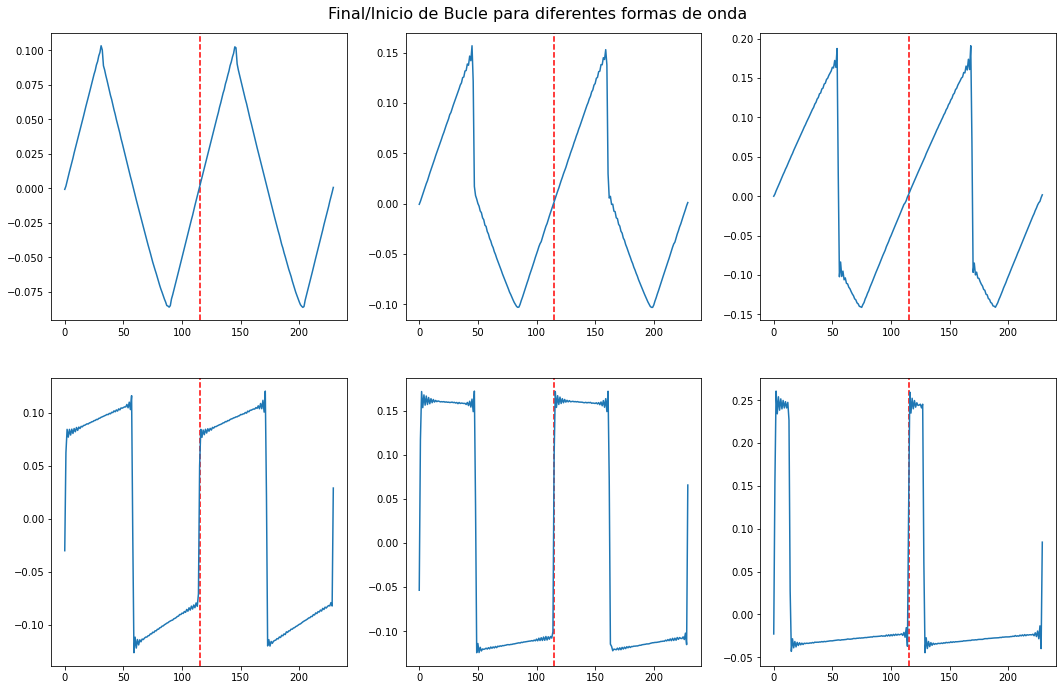

In [3]:
plt.figure(figsize=(18,18))

plt.subplot(3,3,1)
plt.axvline(x=115,c='red',linestyle='dashed')
plt.plot(w1[0:230])

plt.subplot(3,3,2)
plt.axvline(x=115,c='red',linestyle='dashed')
plt.plot(w2[0:230])

plt.subplot(3,3,3)
plt.axvline(x=115,c='red',linestyle='dashed')
plt.plot(w3[0:230])

plt.subplot(3,3,4)
plt.axvline(x=115,c='red',linestyle='dashed')
plt.plot(w4[0:230])

plt.subplot(3,3,5)
plt.axvline(x=115,c='red',linestyle='dashed')
plt.plot(w5[0:230])

plt.subplot(3,3,6)
plt.axvline(x=115,c='red',linestyle='dashed')
plt.plot(w6[0:230])
plt.suptitle('Final/Inicio de Bucle para diferentes formas de onda', fontsize=16,y=0.9)

plt.show()

In [4]:
LoopKobol,sr1 = librosa.load("Resultados/EvaluaciónLoop_Kobol.wav")
LoopKont,sr2 = librosa.load("Resultados/EvaluaciónLoop_Kontakt.wav")

In [5]:
LoopKobol_mfcc = librosa.feature.mfcc(y=LoopKobol[:-44100],sr=sr1)
LoopKont_mfcc = librosa.feature.mfcc(y=LoopKont[:-44100],sr=sr2)

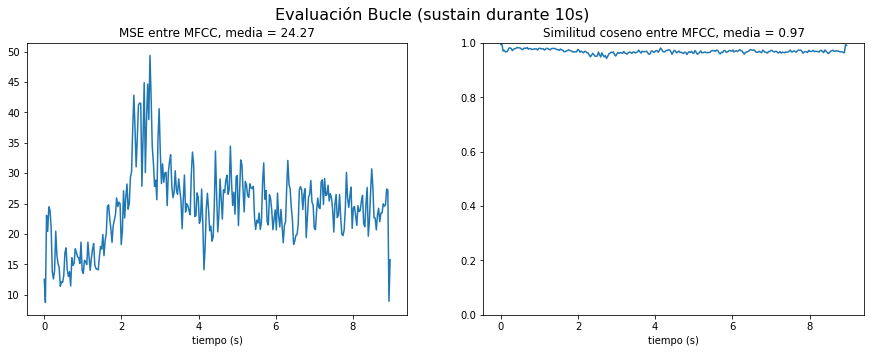

In [6]:
time_axis = np.arange(0,LoopKobol.shape[0]/sr1,(LoopKobol.shape[0]/sr1)/LoopKobol_mfcc.shape[1])

plt.figure(figsize=(15,5))
plt.suptitle('Evaluación Bucle (sustain durante 10s)', fontsize=16)
mse = ((LoopKobol_mfcc[1:,:] - LoopKont_mfcc[1:,:])**2).mean(axis=0)
plt.subplot(1,2,1)
plt.title("MSE entre MFCC, media = "+str(np.round(np.mean(mse),2)))
plt.xlabel("tiempo (s)")

plt.plot(time_axis,mse)

plt.subplot(1,2,2)
coss_sim = np.array([1 - spatial.distance.cosine(LoopKobol_mfcc[1:,i], LoopKont_mfcc[1:,i]) for i in range(0,LoopKont_mfcc.shape[1]) ])

plt.title("Similitud coseno entre MFCC, media = "+str(np.round(np.mean(coss_sim),2)))
plt.xlabel("tiempo (s)")
plt.plot(time_axis,coss_sim)
plt.ylim(0,1)


plt.show()

# Frecuencias

In [7]:
FKobol,sr1 = librosa.load("Resultados/EvaluaciónFrecuencias_Kobol.wav")
FKont,sr2 = librosa.load("Resultados/EvaluaciónFrecuencias_Kontakt.wav")

In [8]:
FKobol_mfcc = librosa.feature.mfcc(y=FKobol,sr=sr1)
FKont_mfcc = librosa.feature.mfcc(y=FKont,sr=sr2)

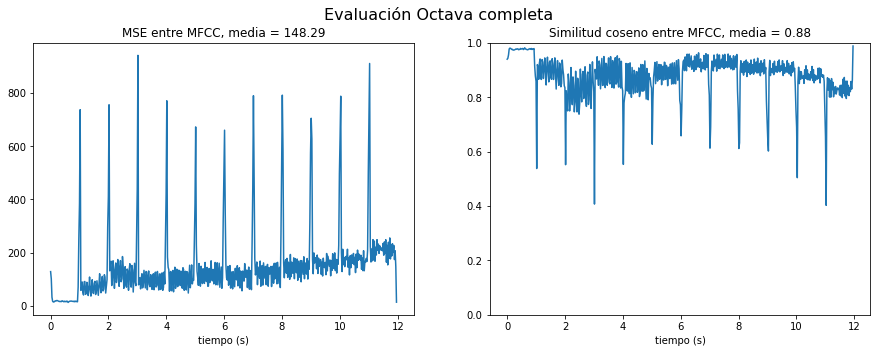

In [9]:
time_axis = np.arange(0,FKobol.shape[0]/sr1,(FKobol.shape[0]/sr1)/FKobol_mfcc.shape[1])

plt.figure(figsize=(15,5))
plt.suptitle('Evaluación Octava completa', fontsize=16)

mse = ((FKobol_mfcc[1:,:] - FKont_mfcc[1:,:])**2).mean(axis=0)
plt.subplot(1,2,1)
plt.plot(time_axis,mse)
plt.xlabel("tiempo (s)")

plt.title("MSE entre MFCC, media = "+str(np.round(np.mean(mse),2)))
plt.subplot(1,2,2)
coss_sim = np.array([1 - spatial.distance.cosine(FKobol_mfcc[1:,i], FKont_mfcc[1:,i]) for i in range(0,FKont_mfcc.shape[1]) ])

plt.title("Similitud coseno entre MFCC, media = "+str(np.round(np.mean(coss_sim),2)))
plt.xlabel("tiempo (s)")
plt.ylim(0,1)


plt.plot(time_axis,coss_sim)
plt.show()

# Barrido forma de onda

In [10]:
WFKobol,sr1 = librosa.load("Resultados/EvaluaciónWF_Kobol.wav")
WFKont,sr2 = librosa.load("Resultados/EvaluaciónWF_Kontakt.wav")

In [11]:
WFKobol_mfcc = librosa.feature.mfcc(y=WFKobol,sr=sr1)
WFKont_mfcc = librosa.feature.mfcc(y=WFKont,sr=sr2)

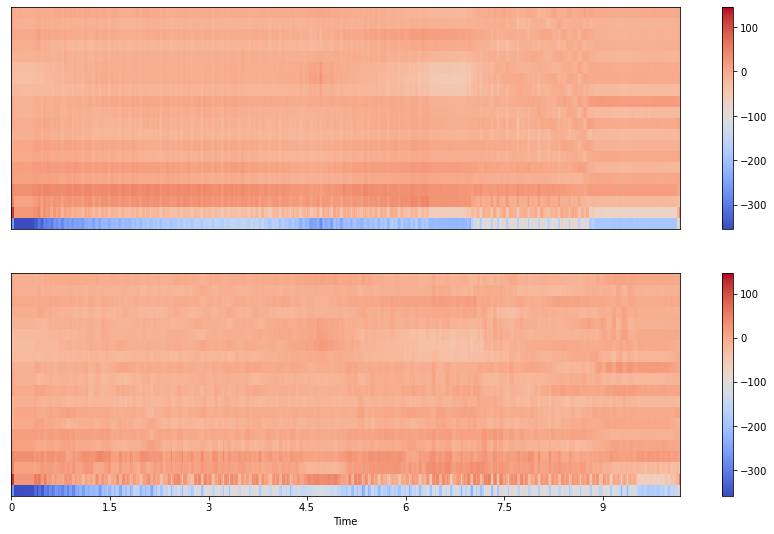

In [12]:
plt.figure(figsize=(15,9))
plt.subplot(2,1,1)
img1 = librosa.display.specshow(WFKobol_mfcc)
plt.colorbar(img1)
plt.subplot(2,1,2)
img2 = librosa.display.specshow(WFKont_mfcc, x_axis='time')
plt.colorbar(img2)

plt.show()

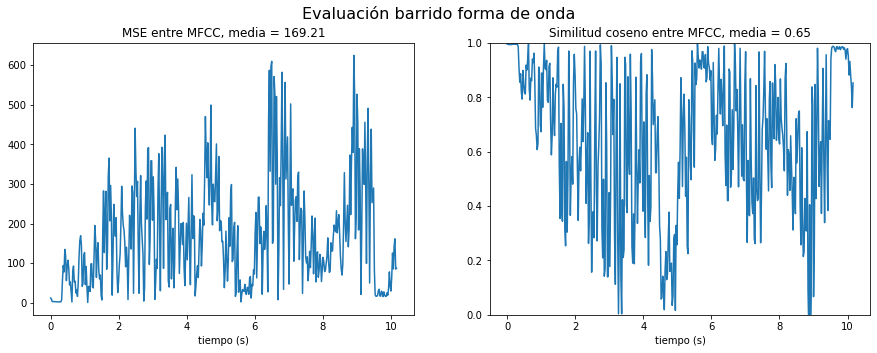

In [13]:
time_axis = np.arange(0,WFKobol.shape[0]/sr1,(WFKobol.shape[0]/sr1)/WFKobol_mfcc.shape[1])

plt.figure(figsize=(15,5))
plt.suptitle('Evaluación barrido forma de onda', fontsize=16)
mse = ((WFKobol_mfcc[1:,:] - WFKont_mfcc[1:,:])**2).mean(axis=0)
plt.subplot(1,2,1)
plt.plot(time_axis,mse)
plt.title("MSE entre MFCC, media = "+str(np.round(np.mean(mse),2)))
plt.xlabel("tiempo (s)")

plt.subplot(1,2,2)
plt.xlabel("tiempo (s)")


coss_sim = np.array([1 - spatial.distance.cosine(WFKobol_mfcc[1:,i], WFKont_mfcc[1:,i]) for i in range(0,WFKont_mfcc.shape[1]) ])
plt.title("Similitud coseno entre MFCC, media = "+str(np.round(np.mean(coss_sim),2)))

plt.plot(time_axis,coss_sim)
plt.ylim(0,1)

plt.show()

# Creación de animación a partir de las grabaciones

In [14]:
from matplotlib.animation import FuncAnimation


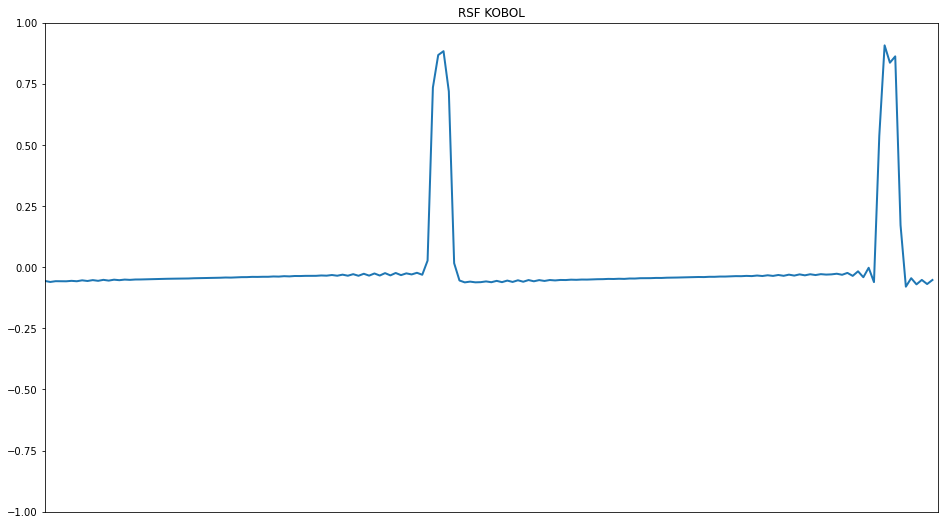

In [15]:
leng=int(sr1*(2*(1/261.824)))

fig = plt.figure(figsize=(16,9))
ax = plt.axes(xlim=(0, leng), ylim=(-1, 1))
line, = ax.plot([], [], lw=2)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.title("RSF KOBOL")

def init():
    line.set_data([], [])
    return line,

def animate(i):
    i=i*2
    x = np.arange(leng)
    y = WFKobol[39+(i*leng):39+((i+1)*leng)]
    line.set_data(x,y)
    return line,

cosine_animation = FuncAnimation(fig, animate, init_func=init, frames=667, interval=15, blit=True)

cosine_animation.save("Kobol.mp4")
